C:\Users\SEC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SEC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SEC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


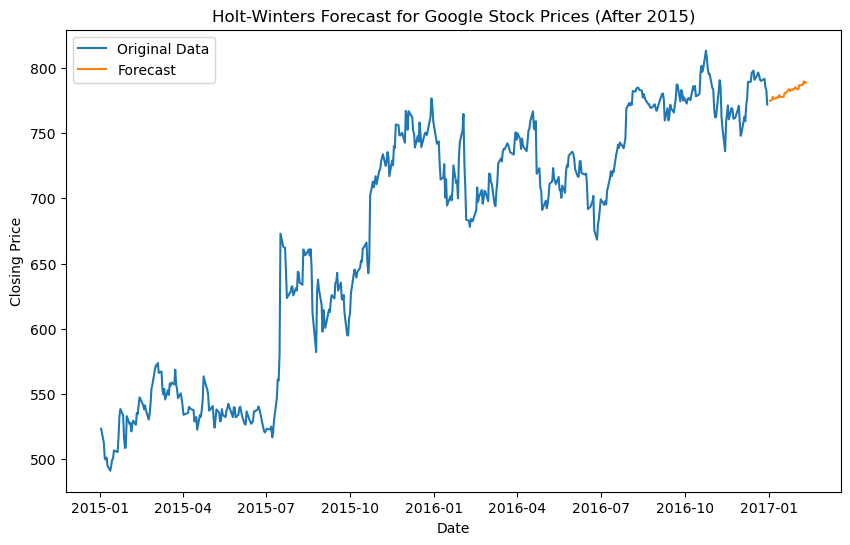

In [23]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('Google_Stock_Price.csv')

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter the data to include only records from 2015 onward
data = data[data.index >= '2015-01-01']

# Convert 'Close' column to numeric (removing invalid values)
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Drop rows with missing values in 'Close' column
clean_data = data.dropna(subset=['Close'])

# Extract 'Close' column for time series forecasting
close_data_clean = clean_data['Close']

# Perform Holt-Winters exponential smoothing
model = ExponentialSmoothing(close_data_clean, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

# Forecast for the next 20 steps (business days)
n_steps = 30
forecast = fit.forecast(steps=n_steps)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(close_data_clean.index, close_data_clean, label='Original Data')
plt.plot(pd.date_range(start=close_data_clean.index[-1], periods=n_steps+1, freq='B')[1:], forecast, label='Forecast')  # 'B' for business days
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Holt-Winters Forecast for Google Stock Prices (After 2015)')
plt.legend()
plt.show()
